In [26]:
import pandas as pd
from plotnine import *
import geopandas

In [27]:
sites = pd.read_csv("data/archaelogical_datasets.csv")

In [28]:
sites.head()

,Archeological ID,Laboratory ID,Site Name,Region,Period,Sample type,Archaeologically suspected species,Plot ID,Latitude,Longitude
0,Zape 2*,ZSM002,Cueva de los Muertos Chiquitos,Mexico,1300 BP,Paleofeces,HUMAN,1,24.02,-104.658
1,Zape 5*,ZSM005,Cueva de los Muertos Chiquitos,Mexico,1300 BP,Paleofeces,HUMAN,2,24.02,-104.658
2,Zape 23,ZSM023,Cueva de los Muertos Chiquitos,Mexico,1300 BP,Paleofeces,HUMAN or CANID,3,24.02,-104.658
3,Zape 25,ZSM025,Cueva de los Muertos Chiquitos,Mexico,1300 BP,Paleofeces,HUMAN,4,24.02,-104.658
4,Zape 27,ZSM027,Cueva de los Muertos Chiquitos,Mexico,1300 BP,Paleofeces,HUMAN,5,24.02,-104.658


In [29]:
sites = sites[['Site Name','Latitude','Longitude']].drop_duplicates()

In [30]:
sites

,Site Name,Latitude,Longitude
0,Cueva de los Muertos Chiquitos,24.020,-104.658
8,Xiaosungang,32.029,116.672
12,Surrey,51.272,-0.341
13,Derragh,53.774,-7.411
14,Cabeço das Amoreiras,39.100,-8.711
15,Binchester Roman Fort,54.668,-1.672
16,Leipzig,51.341,12.375
17,El Collado,38.920,-0.119
18,Cingle del Mas Nou,40.457,-0.133
19,Molpir,48.512,17.425


In [31]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

/Users/borry/miniconda3/envs/coproid_article/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/borry/miniconda3/envs/coproid_article/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figureS3.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


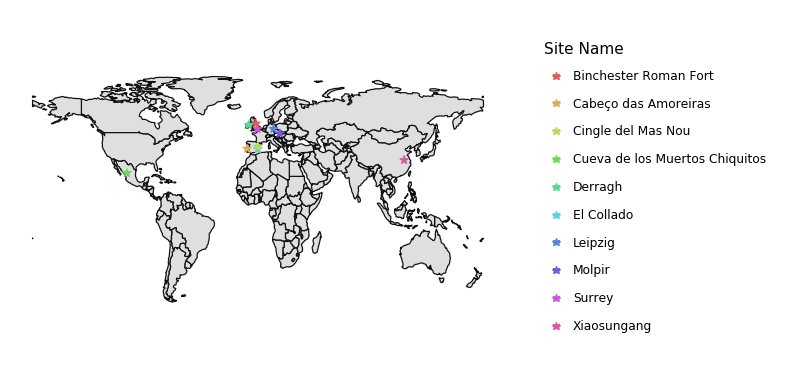

<ggplot: (316783249)>

In [32]:
m = ggplot() 
m += geom_map(world, fill='#DFDFDF') 
m += geom_point(data=sites, mapping=aes(x='Longitude', y='Latitude', color='Site Name'), shape='*', size=3) 
m += theme_void() 
m += theme(aspect_ratio=0.5)
m.save("figureS3.png", dpi=300)
m